In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
from tensorflow.keras.preprocessing.image import img_to_array, load_img


directory = r'C:\Users\HP Probook\Documents\Programming files\Python codes\ML\Brain tumor classification'
train_dir = os.path.join(directory, 'Training')
test_dir = os.path.join(directory, 'Testing')

categories = [] # the names of the different types of brain tumors will be saved here
train_labels = [] # the types of tumors will be coded 0 - 3
train_images = []
images_path = []


# some image properties
img_height = 128
img_width = 128


for index, category in enumerate(sorted(os.listdir(train_dir))):
    categories.append(category)
    category_loc = os.path.join(train_dir, category)
    
    for i, file_name in enumerate(sorted(os.listdir(category_loc))):
        file_path = os.path.join(category_loc, file_name)
        images_path.append(file_path)
        image = load_img(file_path, color_mode='rgb', target_size=(img_height, img_width)) # load the image
        image = img_to_array(image) # convert each image to an array
        train_images.append(image) # append each array to the train images list we earlier created
        train_labels.append(index)

In [3]:
len(train_images)

2870

In [4]:
len(train_labels)

2870

In [5]:
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [6]:
train_labels[-1]

3

In [7]:
categories

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
train_images[4]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [3., 3., 3.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [3., 3., 3.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

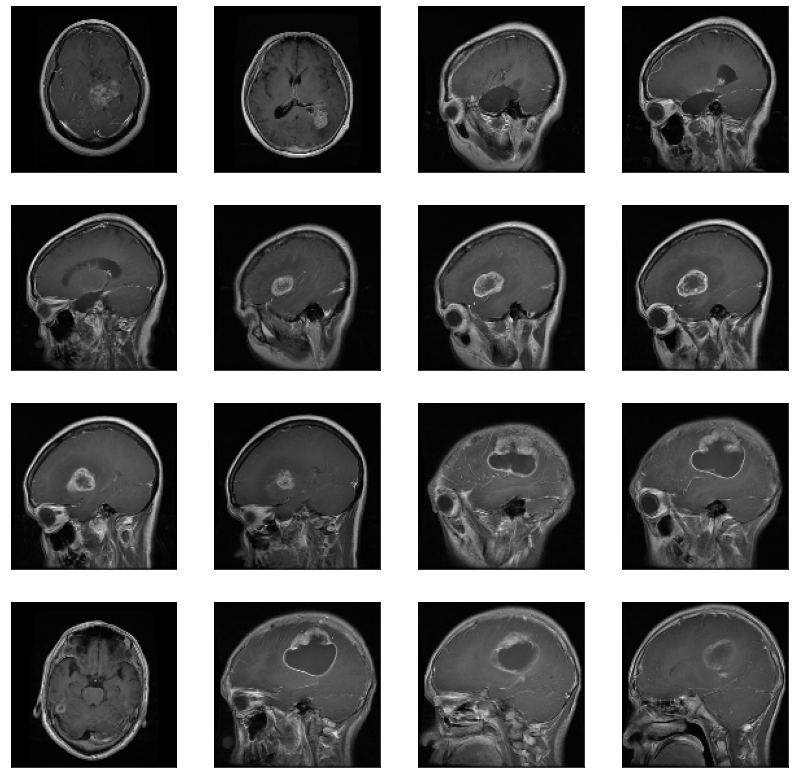

In [9]:
# let's visualize some of the images

images_path = images_path[:16]# visualize for first 12 images in the dataset
plt.figure(figsize=(14, 14)) # create a new figure plot
index = 0

for i in range(len(images_path)):
    plt.subplot(4, 4, i+ 1) # start plotting each image from the first
    plt.xticks([])
    plt.yticks([])
    
    sign = images_path[i]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    
plt.show()

In [10]:
# alright, let's convert the images into arrays

train_labels = np.array(train_labels)
train_images = np.array(train_images)

In [11]:
train_images.shape

(2870, 128, 128, 3)

In [12]:
train_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [13]:
# clip the pixel values in the train images array to range 0 -1
train_images = train_images[:]/255

In [14]:
train_images[200]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [15]:
len(train_images)

2870

In [16]:
# now, let's split into train & validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=42, shuffle=True, test_size=0.2)

In [17]:
len(X_train)

2296

In [18]:
len(X_val)

574

In [19]:
X_train[0].shape

(128, 128, 3)

## ML Models

### Baseline model

In [20]:
model = models.Sequential(name='baseline_model')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [21]:
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)    

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("brain_tumor_baseline.h5", save_best_only=True)

In [27]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
72/72 [==============================] - 56s 760ms/step - loss: 1.0051 - acc: 0.5745 - val_loss: 0.7009 - val_acc: 0.7021
Epoch 2/20
72/72 [==============================] - 55s 764ms/step - loss: 0.5921 - acc: 0.7535 - val_loss: 0.6168 - val_acc: 0.7613
Epoch 3/20
72/72 [==============================] - 57s 791ms/step - loss: 0.3762 - acc: 0.8593 - val_loss: 0.5231 - val_acc: 0.8049
Epoch 4/20
72/72 [==============================] - 60s 838ms/step - loss: 0.2368 - acc: 0.9151 - val_loss: 0.3600 - val_acc: 0.8693
Epoch 5/20
72/72 [==============================] - 55s 767ms/step - loss: 0.1391 - acc: 0.9573 - val_loss: 0.4478 - val_acc: 0.8502
Epoch 6/20
72/72 [==============================] - 56s 774ms/step - loss: 0.0848 - acc: 0.9686 - val_loss: 0.3807 - val_acc: 0.8902
Epoch 7/20
72/72 [==============================] - 61s 853ms/step - loss: 0.0517 - acc: 0.9843 - val_loss: 0.3550 - val_acc: 0.8815
Epoch 8/20
72/72 [==============================] - 62s 857ms/step - 

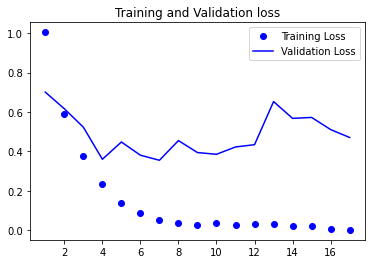

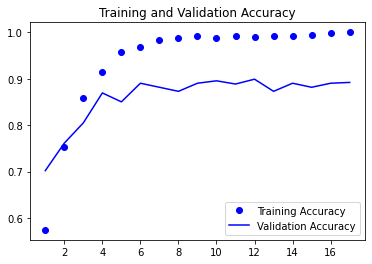

In [30]:
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+ 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()


plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## The Test set

In [31]:
# load the images
test_labels = [] 
test_images = []

for index, category in enumerate(sorted(os.listdir(test_dir))):
    category_loc = os.path.join(train_dir, category)
    
    for i, file_name in enumerate(sorted(os.listdir(category_loc))):
        file_path = os.path.join(category_loc, file_name)
        image = load_img(file_path, color_mode='rgb', target_size=(img_height, img_width)) # load the image
        image = img_to_array(image) # convert each image to an array
        test_images.append(image) # append each array to the train images list we earlier created
        test_labels.append(index)
        
# convert the images & labels to numpy arrays
test_labels = np.array(test_labels)
test_images = np.array(test_images)

# clip the image to the range 0-1 pixels
test_images = test_images[:]/255

### Evaluating the performance on the test set

In [42]:
model.evaluate(test_images, test_labels)

90/90 [==============================] - 16s 175ms/step - loss: 0.0899 - acc: 0.9721


[0.08993401378393173, 0.9721254110336304]

The Baseline model seemed to perform very well on the dataset. Let's visualize how this works

In [33]:
categories

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [34]:
tumor_dict = dict(enumerate(categories))
tumor_dict

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

In [35]:
test_images.shape

(2870, 128, 128, 3)

In [36]:
# let's shuffle the test dataset

indices = np.arange(test_images.shape[0]) # 2870
np.random.shuffle(indices)
test_images = test_images[indices]
test_labels = test_labels[indices]

In [51]:
# let's visualize some predictions

test_images = test_images[:30]
test_labels = test_labels[:30]
predict_proba = model.predict(test_images)
prediction = np.argmax(predict_proba, axis=1)

In [52]:
prediction

array([1, 3, 0, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 3, 0, 1, 1, 0, 1,
       0, 0, 1, 3, 3, 3, 0, 0], dtype=int64)

In [54]:
# for the predicted cancer class

predicted_tumor = []

for val in prediction:
    for key, value in tumor_dict.items():
        if val == key:
            predicted_tumor.append(value)

In [55]:
predicted_tumor

['meningioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'no_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'glioma_tumor']

In [57]:
# for the labeled tumor type

actual_tumor_type = test_labels
actual_tumor_type = list(actual_tumor_type)

actual_tumor = []

for val in actual_tumor_type:
    for key, value in tumor_dict.items():
        if val == key:
            actual_tumor.append(value)

In [58]:
actual_tumor

['meningioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'no_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'glioma_tumor']

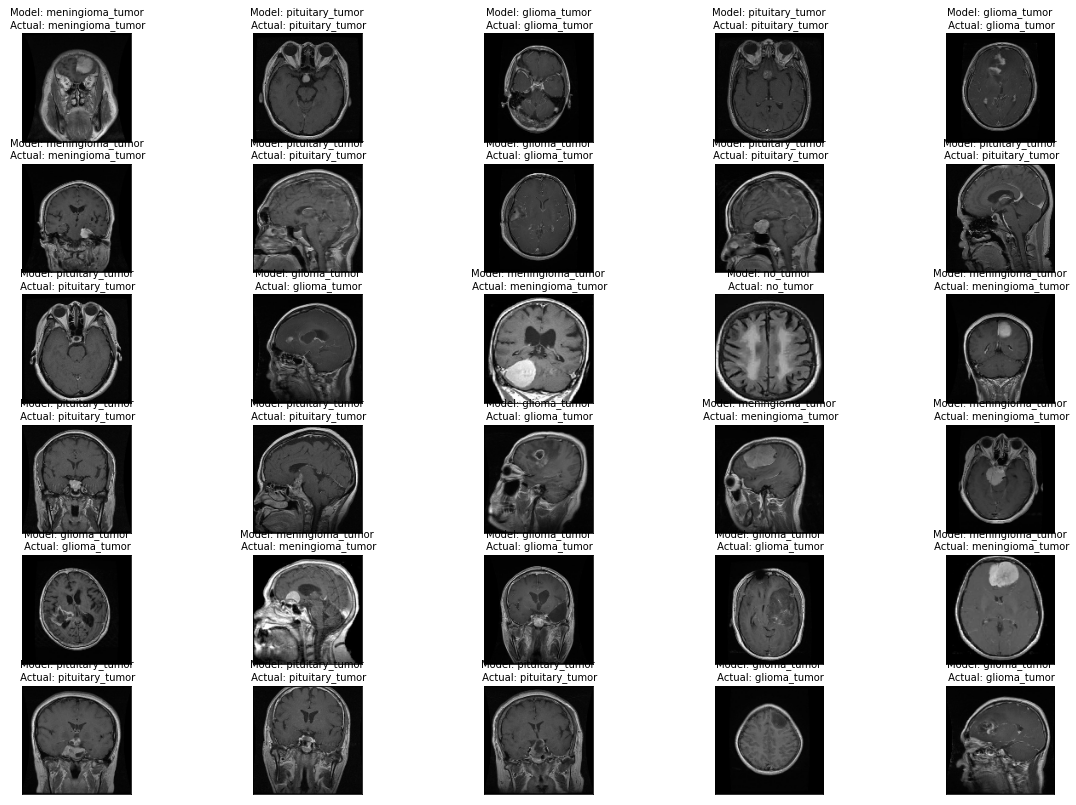

In [62]:
# now to visualize this information

plt.figure(figsize=(20, 14))

for i in range(len(prediction)): # for 30 images
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    
    # add each image to subplot and plot it
    image = test_images[i]
    plt.imshow(image)
    
    # add the predicted and actual labeled tumor type
    
    plt.title(f'Model: {predicted_tumor[i]}\n Actual: {actual_tumor[i]}', fontsize=10)
    
plt.show()